Исскуственный нейрон это математическая функция, всю прелесть адаптации осуществляет метод обратного распространения ошибки
формула нейрона:
$$f(x) = w*x + b$$
x - входное значение или вектор
w - вес
и - смещение
Помимо линейной части выходное значение проходит этап нелинейного преобразования, в данном примере я буду использовать сигмоиду
$$predict = sigma(f) = \frac {1}{1+e^{-f(x)}}$$
Значение sigma(f) становится выходным значением predict
Далее вычмслям функцию ошибки в нашем случае это среднеквадратичная ошибка MSE
$$MSE(sigma) = \sum(predict - true)^{2}$$


In [47]:
import math


class Neuron:
    # стартовая инициализация весов
    def __init__(self,w:float,b:float)->None:
        self.w: float = w
        self.b: float = b

    def linear(self, x: float) -> float:
        return self.w * x + self.b

    def sigmoid(self, x: float)->float:
        return 1 / (1 + math.e ** (-1 * self.linear(x)))

    def loss(self,x:float,y:float)-> float:
        return (self.sigmoid(self.linear(x)) - y) ** 2

    def dmse_by_dw(self,x,y)-> float:
        return 2*(self.sigmoid(x) -y) * self.sigmoid(x) *(1-self.sigmoid(x) ) * self.w

    def dmse_by_db(self,x,y)-> float:
        return 2*(self.sigmoid(x) -y) * self.sigmoid(x) *(1-self.sigmoid(x) )

    def back_prop(self,x,y,learning_rate:float) -> None:
        gradient_w = self.dmse_by_dw(x,y)
        gradient_b = self.dmse_by_db(x,y)
        # print(f'{gradient_w=} {gradient_b=}')
        self.w = self.w - gradient_w * learning_rate
        self.b = self.b - gradient_b * learning_rate
        # print(f"After backprop {self.w}*x + {self.b}")


Для обратного распространения ошибки надо вычислить частные производные по коэфициентам w и b
$$ \frac{\partial MSE}{\partial \sigma} = 2*(\sigma -y) $$
$$ \frac{\partial \sigma}{\partial f} = \frac {e^{-f}} {(1+e^{-f})^{2}} = \sigma(f)*(1-\sigma(f)) $$
$$ \frac{\partial \sigma}{\partial f} = w $$
$$ \frac {\partial f}{\partial b} = 1 $$
$$ \frac{\partial MSE}{\partial w}= \frac{\partial MSE}{\partial \sigma} * \frac{\partial \sigma}{\partial f} * \frac{\partial \sigma}{\partial f} $$
$$ \frac{\partial MSE}{\partial w}= 2*(\sigma(f) -y) * \sigma(f)*(1-\sigma(f)) * w $$
$$ \frac{\partial MSE}{\partial b}= \frac{\partial MSE}{\partial \sigma} * \frac{\partial \sigma}{\partial f} $$
$$ \frac{\partial MSE}{\partial b}= 2*(\sigma(f) -y) * \sigma(f)*(1-\sigma(f)) $$



In [20]:
neuron1 = Neuron(w=0.5,b=0.4)
lr = 1
x = 0.5
y = 0.8
for i in range(5):
    print(f'\nIteration step {i}')
    print(f'Prediction = {neuron1.sigmoid(x)}')
    print(f'Loss = {neuron1.loss(x,y)}')
    neuron1.back_prop(x,y,lr)


Iteration step 0
Prediction = 0.6570104626734988
Loss = 0.01594989672819015
gradient_w=-0.032222365449819025 gradient_b=-0.06444473089963805
After backprop 0.532222365449819*x + 0.46444473089963806

Iteration step 1
Prediction = 0.6749272521439833
Loss = 0.009751331882424814
gradient_w=-0.029209446988673643 gradient_b=-0.054882035939971555
After backprop 0.5614318124384927*x + 0.5193267668396097

Iteration step 2
Prediction = 0.6899836092346808
Loss = 0.005652084713971616
gradient_w=-0.026424564365902226 gradient_b=-0.04706638238245032
After backprop 0.587856376804395*x + 0.56639314922206

Iteration step 3
Prediction = 0.7027277866113136
Loss = 0.0030246267793954747
gradient_w=-0.02389084279219802 gradient_b=-0.040640611780158556
After backprop 0.611747219596593*x + 0.6070337610022185

Iteration step 4
Prediction = 0.7135947321269253
Loss = 0.0014189479421955293
gradient_w=-0.021606024181332784 gradient_b=-0.035318549049688425
After backprop 0.6333532437779257*x + 0.642352310051907


Выходная функция нейрона - та функция нейлинейности которую мы выбрали. в Нашем случае это сигмоида. Коэфициенты линейной части нейрона отвечают за форму этой сигмоиды. Вес "w" отвечает за масштаб сигмоиды в ширину, смещение "b" - за расположение сигмоиды по оси X. Попробуем визулизировать изменение сигмоиды во времени. Для наглядности задам около 10 точек в двумерном пространстве в интервале 0-1.

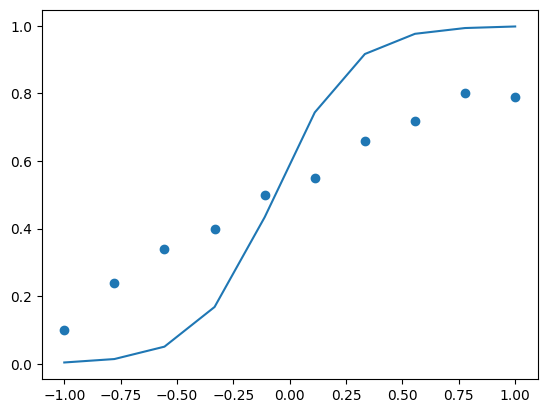

In [92]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(1000)
X = np.linspace(-1,1,10)
Y = [0.1,0.24,0.34,0.4,0.5,0.55,0.66,0.72,0.8,0.79]
plt.scatter(X,Y)
neuron2 = Neuron(w=6,b=0.4)
plt.plot(X,[neuron2.sigmoid(x) for x in X])

For 0 epoch  loss = 0.8451074906427148
For 1 epoch  loss = 0.8293041326506124
For 2 epoch  loss = 0.8677113814091081
For 3 epoch  loss = 0.7766149158833324
For 4 epoch  loss = 0.557682303881667
For 5 epoch  loss = 0.47344813339042746
For 6 epoch  loss = 0.4188907738836441
For 7 epoch  loss = 0.3728284388423675
For 8 epoch  loss = 0.33351749632450334
For 9 epoch  loss = 0.30002900627150564


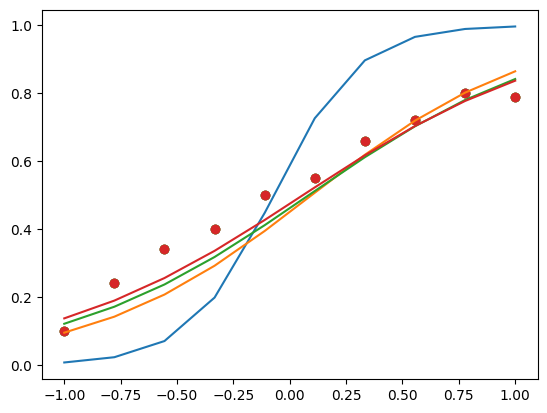

In [93]:
lr = 4
num_epochs = 10
loss_lst = []
for epoch in range(num_epochs):
    epoch_loss = 0
    for x,y in zip(X,Y):
        epoch_loss += neuron2.loss(x,y)
        neuron2.back_prop(x,y,lr)
    loss_lst.append(epoch_loss)
    print(f'For {epoch} epoch  loss = {epoch_loss}')
    if epoch % 3 == 0:
        plt.scatter(X,Y)
        plt.plot(X,[neuron2.sigmoid(x) for x in X])

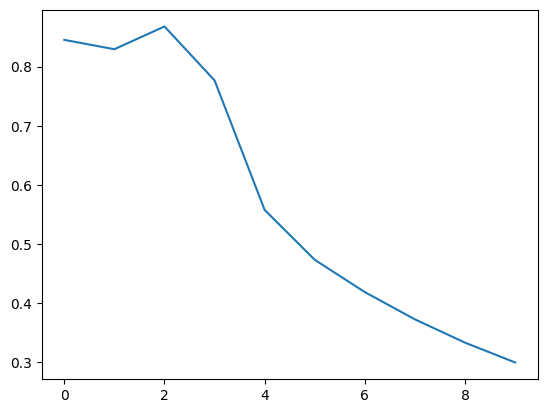

In [94]:
plt.plot(range(num_epochs),loss_lst)